# Introduction to SymPy
Here we give a (quick) introduction to SymPy. This tutorial assumes you are already familiar with SymPy expressions, so this notebook should serve as a refresher.

## Expressions
The function init_printing() will enable LaTeX pretty printing in the notebook for SymPy expressions. We recommend calling it at the top of any notebook that uses SymPy.

In [2]:
#!pip install sympy
from sympy import *
init_printing()

import numpy as np

SymPy symbols are created with the symbols() function. SymPy expressions are built up from symbols, numbers, and SymPy functions,

In [3]:
a=Symbol('a')
x, y, z = symbols('x y z')

SymPy automatically pretty prints symbols with greek letters and subscripts.

In [3]:
x1, x_2, x3 = symbols('alpha1 omega_2 theta3')
x1, x_2, x3

In [4]:
sin(x1 + 1) - cos(x3)

Dividing two integers in Python creates a float, like 1/2 -> 0.5. If you want a rational number, use Rational(1, 2) or S(1)/2.

In [11]:
x1 + 1/2

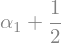

In [12]:
x1+Rational(1,2)
#x + S(1)/2

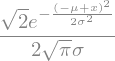

In [17]:
# PDF of Normal Distribution
mu, sigma=symbols('mu sigma')
1/(sigma*sqrt(2*pi))*exp(-1/(2*sigma**2)*(x-mu)**2)

^ is the XOR operator. Use ** for powers.

In [ ]:
#x ^ y

In [14]:
x ** y

All SymPy expressions are immutable. Functions that operate on an expression return a new expression.

In [19]:
expr = x**2 + x*y+3
expr

In [22]:
expr.subs(x,2).subs(y,7)

## Floating point representation
Since most languages targeted will not support symbolic representation it is useful to let SymPy evaluate a floating point approximation (up to a user specified number of digits).

In [21]:
sqrt(2)

In [24]:
sqrt(2).evalf(5)

## Undefined functions
Undefined functions are created with Function(). Undefined are useful to state that one variable depends on another (for the purposes of differentiation).

In [24]:
f = Function('f')
f(x) + 1

## Polynomial/Rational Function Simplification

expand() is one of the most common simplification functions in SymPy. Although it has a lot of scopes, for now, we will consider its function in expanding polynomial expressions. For example:

In [30]:
expr2=(x+1)**2
expr2

In [32]:
expand(expr2)

In [33]:
expand((x + 2)*(x - 3))

In [34]:
expand((x-1)*(x**2+1))

### Factor
factor() takes a polynomial and factors it into irreducible factors over the rational numbers. For example:

In [28]:
factor(x**3 - x**2 + x - 1)

In [30]:
factor(x**2*z + 4*x*y*z + 4*y**2*z)

### Collect
collect() collects common powers of a term in an expression. For example

In [37]:
b,c=symbols('b c')
expr = (2*x**3+3*x**2+2*x)+(a*x**3-b*x**2+c*x)
expr

In [38]:
collected_expr = collect(expr, x)
collected_expr

In [39]:
collected_expr.coeff(x,2)

collect() is particularly useful in conjunction with the .coeff() method. expr.coeff(x, n) gives the coefficient of x**n in expr:

In [40]:
collected_expr.coeff(x, 3)

In [46]:
lam, t = symbols('lambda t')
expr=exp(-lam*(1-t))
print("PGF of Poisson :")
expr

PGF of Poisson :


In [49]:
p, n =symbols('p n')
expr=(p*x+1-p)**3
expr

In [55]:
exp_expr=expand(expr)
exp_expr.coeff(x,2)

In [53]:
collect_exp_expr=collect(exp_expr,x)
collect_exp_expr.coeff(x,1)

### Cancel
cancel() will take any rational function and put it into the standard canonical form, pq, where p and q are expanded polynomials with no common factors, and the leading coefficients of p and q do not have denominators (i.e., are integers).


In [4]:
expr=factor(x**2 - 1)/(x + 1)
display(expr)
cancel(expr)

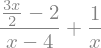

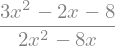

In [59]:
expr = 1/x + (3*x/2 - 2)/(x - 4)
display(expr)
cancel(expr)

### Apart
apart() performs a partial fraction decomposition on a rational function.

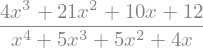

In [47]:
expr = (4*x**3 + 21*x**2 + 10*x + 12)/(x**4 + 5*x**3 + 5*x**2 + 4*x)
expr

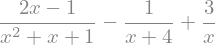

In [48]:
apart(expr)

## Special Functions
SymPy implements dozens of special functions, ranging from functions in combinatorics to mathematical physics.

In [60]:
x, y, z = symbols('x y z')
k, m, n = symbols('k m n')

In [65]:
factorial(n)

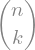

In [67]:
binomial(n,k)

In [66]:
gamma(z)

### Rewrite

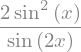

In [69]:
tan(x).rewrite(sin)

In [60]:
factorial(x).rewrite(gamma)

In [71]:
gamma(x).rewrite(factorial)

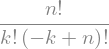

In [62]:
binomial(n,k).rewrite(factorial)

### expand_func

In [63]:
expand_func(gamma(x + 3))

## Derivatives
Derivatives are computed with the diff() function, using the syntax diff(expr, var1, var2, ...).

In [10]:
diff(x**2+x*y**2, x)

In [65]:
diff(sin(x + 1)*cos(y), x, y)

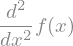

In [13]:
f=Function('f')
diff(f(x) + 1, x,x)

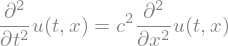

In [15]:
u=Function('u')
t,c=symbols('t c')
Eq(diff(diff(u(t,x),t),t),c**2*diff(diff(u(t,x),x),x))

In [17]:
t,p=symbols('t p')
expr=(p*t+1-p)**4
diff(diff(diff(expr,t),t),t)

In [123]:
expr.diff(t,3)

## Integration

In [18]:
integrate(sin(x), x)

In [20]:
integrate(x, (x, 0, 1))

In [78]:
integrate(exp(-x**2 - y**2), (x, -oo, oo), (y, -oo, oo))

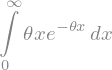

In [24]:
theta=Symbol('theta')
Ex = Integral(x*theta*exp(-theta*x), (x, 0, oo))
Ex

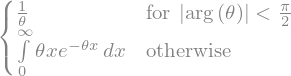

In [25]:
Ex.doit()

## Finding Limit

In [26]:
limit(1/x**2,x,0)

In [82]:
limit(sin(x)/x, x, 0)

In [84]:
expr = x**2/exp(x)
expr
#expr.subs(x, 2)

In [86]:
limit(expr, x, 1)

Like Derivative and Integral, limit has an unevaluated counterpart, Limit. To evaluate it, use doit.

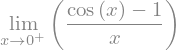

In [27]:
expr = Limit((cos(x) - 1)/x, x, 0)
expr

In [88]:
expr.doit()

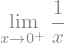

In [28]:
Limit(1/x, x, 0, '+')

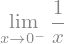

In [29]:
Limit(1/x, x, 0, '-')

## Series Expansion

In [34]:
expr = 1/(1-x)
expr.series(x, 0, 5)

In [35]:
expr.series(x, 0, 8).removeO() 

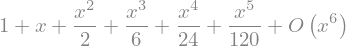

In [36]:
exp(x).series(x, x0=0)

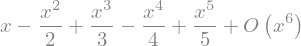

In [38]:
log(1+x).series(x)

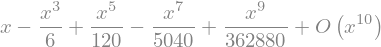

In [37]:
sin(x).series(x,0,10)

In [39]:
expr=S(1)/(1-x)
expr.series(x,0,5)

## Matrices
Matrices are created with Matrix. A matrix can contain any symbolic expression. See Matrix? for different ways to create a Matrix.

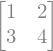

In [100]:
Matrix([[1, 2], [3, 4]])

In [101]:
# An unnested list will create a column vector
Matrix([1, 2, 3])

In [102]:
Matrix([x, y, z])

Matrices support all common operations, and have many methods for performing operations.

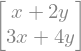

In [103]:
Matrix([[1, 2], [3, 4]])*Matrix([x, y])

for example, calculating the Jacobian matrix is as easy as:

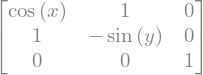

In [104]:
Matrix([sin(x) + y, cos(y) + x, z]).jacobian([x, y, z])

### Matrix symbols
SymPy can also operate on matrices of symbolic dimension ( n×m ). MatrixSymbol("M", n, m) creates a matrix  M  of shape  n×m .

In [46]:
n, m = symbols('n m', integer=True)
M = MatrixSymbol("M", n, m)
b = MatrixSymbol("b", m, 1)

In [47]:
M*b

In [48]:
(M*b).shape

Some matrix expression functions do not evaluate unless you call doit.

In [49]:
Transpose(M*b)

In [112]:
Transpose(M*b).doit()

Write a matrix expression representing
Au+Bv,
where  A  and  B  are  100×100  and  u  and  v  are  100×1 .

In [113]:
A = MatrixSymbol("A", 100, 100)
B = MatrixSymbol("B", 100, 100)
u = MatrixSymbol("u", 100, 1)
v = MatrixSymbol("v", 100, 1)
A*u+B*v

### Indexed
Indexed symbols can be created with IndexedBase and Idx. IndexedBase("A") represents an array A and Idx('i') represents an index i. You can also use symbols('i') instead of Idx('i').

In [54]:
A = IndexedBase("A")
m,n= symbols('m n')
A[m,n]

## Solving systems of equations
A useful tool in your toolbelt when manipulating expressions is the solve function. solve solves equations symbolically (not numerically). The return value is a list of solutions.

You can give solve an Eq, or if you give it an expression, it automatically assumes that it is equal to 0.

In [55]:
solve(Eq(x**2, 4), x)

In [58]:
solve(x**2 - 6*x + 9, x)

It can also handle systems of equations. The return is a list of dictionaries, mapping symbols to solutions.

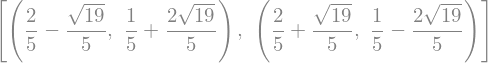

In [59]:
eq1 = x**2 + y**2 - 4  # circle of radius 2
eq2 = 2*x + y - 1  # straight line: y(x) = -2*x + 1
solve([eq1, eq2], [x, y])

Solve the following system of equations:
$$7=3x-y$$
$$8=2x+y$$

In [64]:
eq1=3*x-y-7
eq2=2*x+y-8
display(solve([eq1,eq2],[x,y]))
display(linsolve([eq1,eq2],[x,y]))

In [117]:
x,y,z=symbols('x y z')
linsolve([x + y + z - 1, x + y + 2*z - 3 ], (x, y, z))

In [65]:
solveset(Eq(x**2, 1), x)

In [119]:
solveset(Eq(x**2 - 1, 0), x)

In [120]:
solveset(x**2 - 1, x)

Solving differential equations
If you are dealing with a differential equation, say:

$$f′′(x)=−f(x)$$
 
SymPy's dsolve can (sometimes) produce an exact symbolic solution. Like solve, dsolve assumes that expressions are equal to 0.

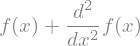

In [66]:
f = Function('f')
display(f(x).diff(x, 2) + f(x))
dsolve(f(x).diff(x, 2) + f(x))

**Solve the following ODE:**
$$f′′(x)+2f′(x)+f(x)=sin(x)$$

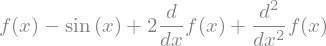

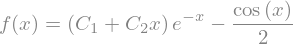

In [68]:
f = Function('f')
expr=f(x).diff(x, 2) + 2*f(x).diff(x, 1)+f(x)-sin(x)
display(expr)
display(dsolve(expr))

Write a symbolic expression for pdf of Normal Distribution
$$ \frac{1}{\sigma\sqrt{2\pi}} e^{\frac{{(x-\mu)}^2}{2\sigma^2}}$$
 
Remember that the function for  $e^x$  is exp(x). You will need to create symbols for sigma and mu. Square root is sqrt.

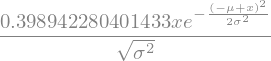

In [86]:
mu1, sig1,x=symbols('mu sigma x')
mu1, sig1
x/sqrt(2*np.pi*sig1**2)*exp(-((x-mu1)/(sig1))**2/2)

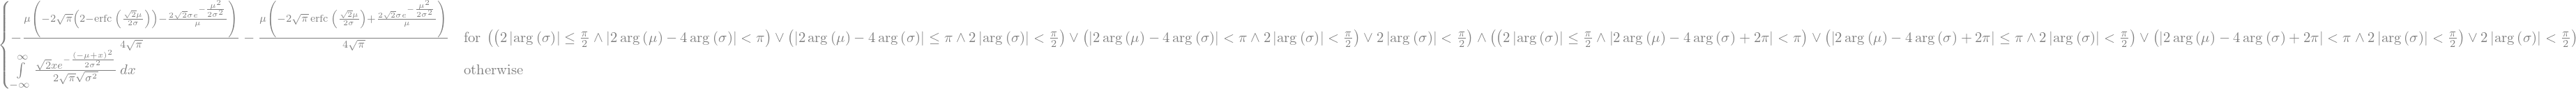

In [90]:
Ex2=integrate(x/sqrt(2*pi*sig1**2)*exp(-((x-mu1)/(sig1))**2/2),(x,-oo,+oo))
Ex2